In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data

In [3]:
df = pd.DataFrame(X,columns=iris['feature_names'])

In [4]:
df = df[['sepal length (cm)','sepal width (cm)']]

In [5]:
X = df
data = X.copy()

# dendrogram of the iris data using hierarchical

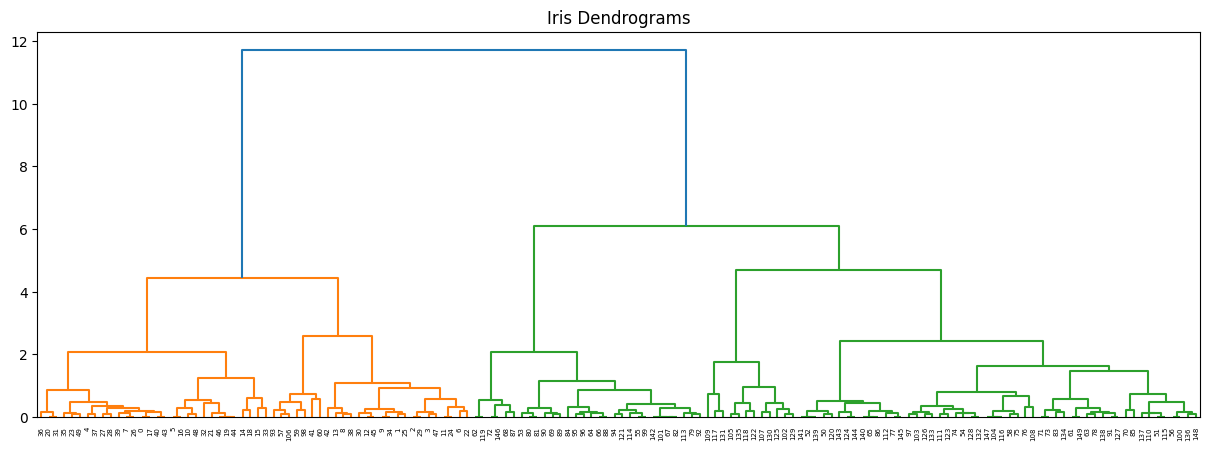

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 5))
plt.title("Iris Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method="ward"))

based on dendogram lets choose k (no of clusters) = 2,3,5,6

# Agglomerative Clustering

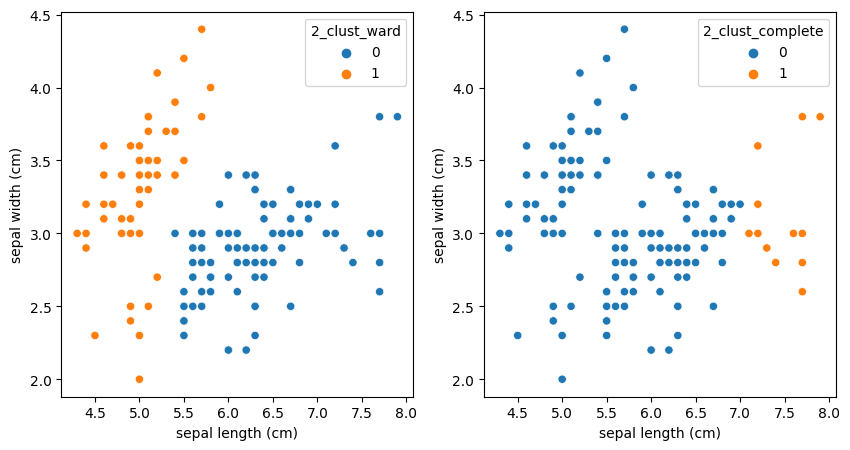

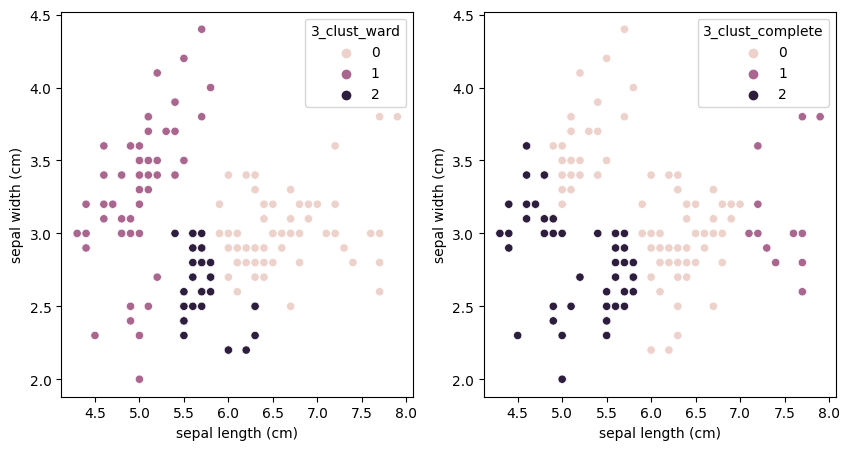

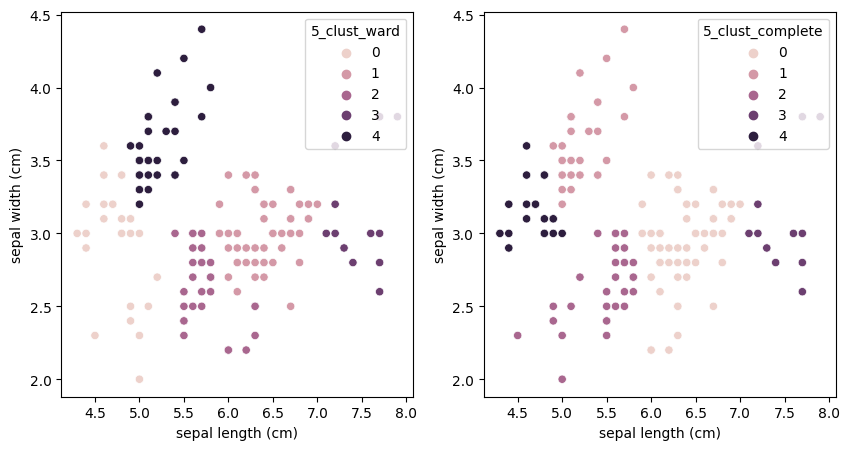

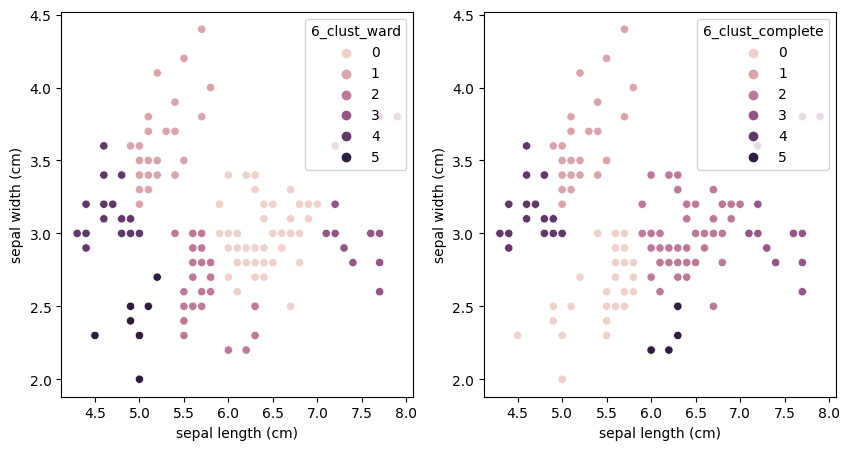

In [7]:
for k in [2,3,5,6]:
    agg_clustering_ward = AgglomerativeClustering(linkage='ward',n_clusters=k)
    agg_clustering_complete = AgglomerativeClustering(linkage='complete',n_clusters=k)
    data[f'{k}_clust_ward'] = agg_clustering_ward.fit_predict(X)
    data[f'{k}_clust_complete'] = agg_clustering_complete.fit_predict(X)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
    sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)", data=data, hue=f"{k}_clust_ward",ax=ax1)
    sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)", data=data, hue=f"{k}_clust_complete",ax=ax2)
    plt.show()

# KMeans

In [8]:
from sklearn.cluster import KMeans

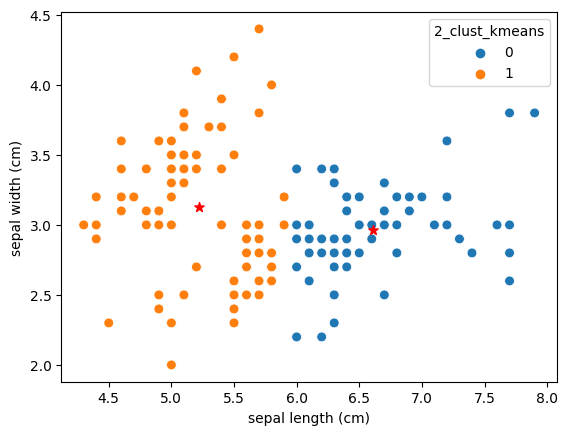

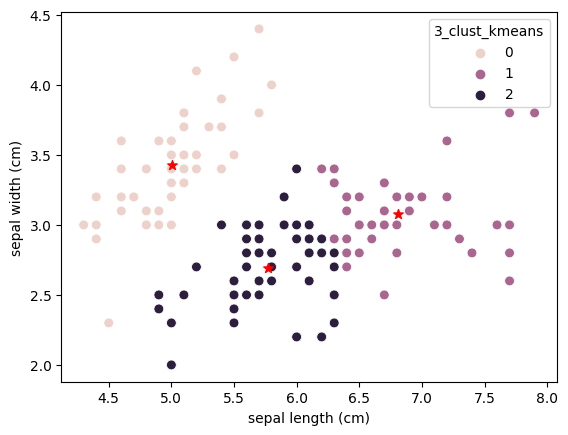

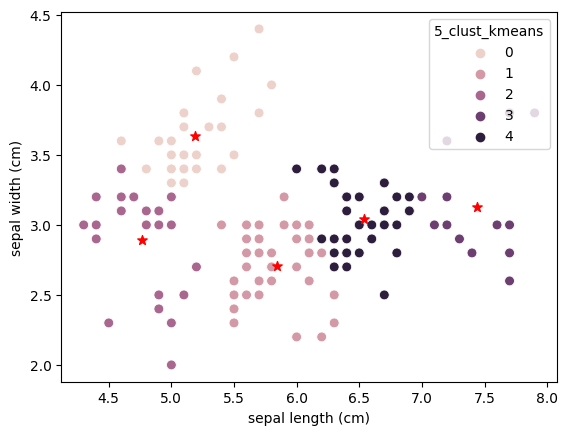

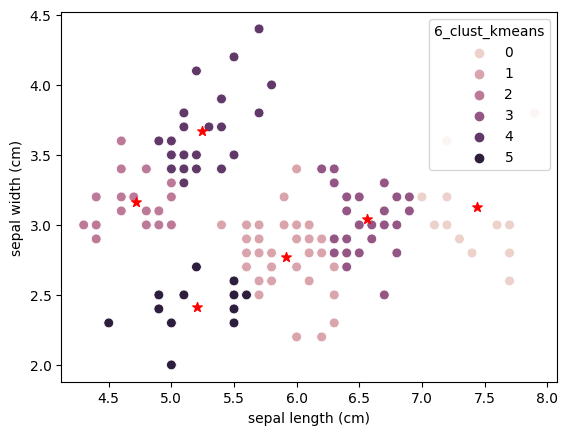

In [9]:
for k in [2,3,5,6]:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    data[f"{k}_clust_kmeans"] = kmeans.fit_predict(X)
    sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",s=50, data=data, hue=f"{k}_clust_kmeans")
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,color='red',marker='*')
    plt.show()

Q1. Based on the scatter plot of the clustered data, which makes the most sense? Give
logical interpretation from the clusters

A. Two clusters are separating the data better than other values of k, more number of clusters are also separating but that much clusters is unnecessary

Q2. Compare the plots and clusters found by euclidean distance and complete linkage.

A. It leads to elongated or irregularly shaped clusters,results in more spread-out or loosely connected clusters and is creating clusters that are more connected or chained together. 

Q3. Compare the scatter plots from Agglomerative and K-Means clustering

A.  In k-means clustering, the clusters are typically spherical and evenly sized.On the other hand, agglomerative clustering does not assume a specific cluster shape, and the resulting clusters are vary in shape, including irregular and elongated clusters.